# Upload Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [5]:
data = pd.read_csv("diabetes.csv")

# Reading Dataset

In [6]:
data.head(15)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
data.shape

(768, 9)

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Check if there is any Null values

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

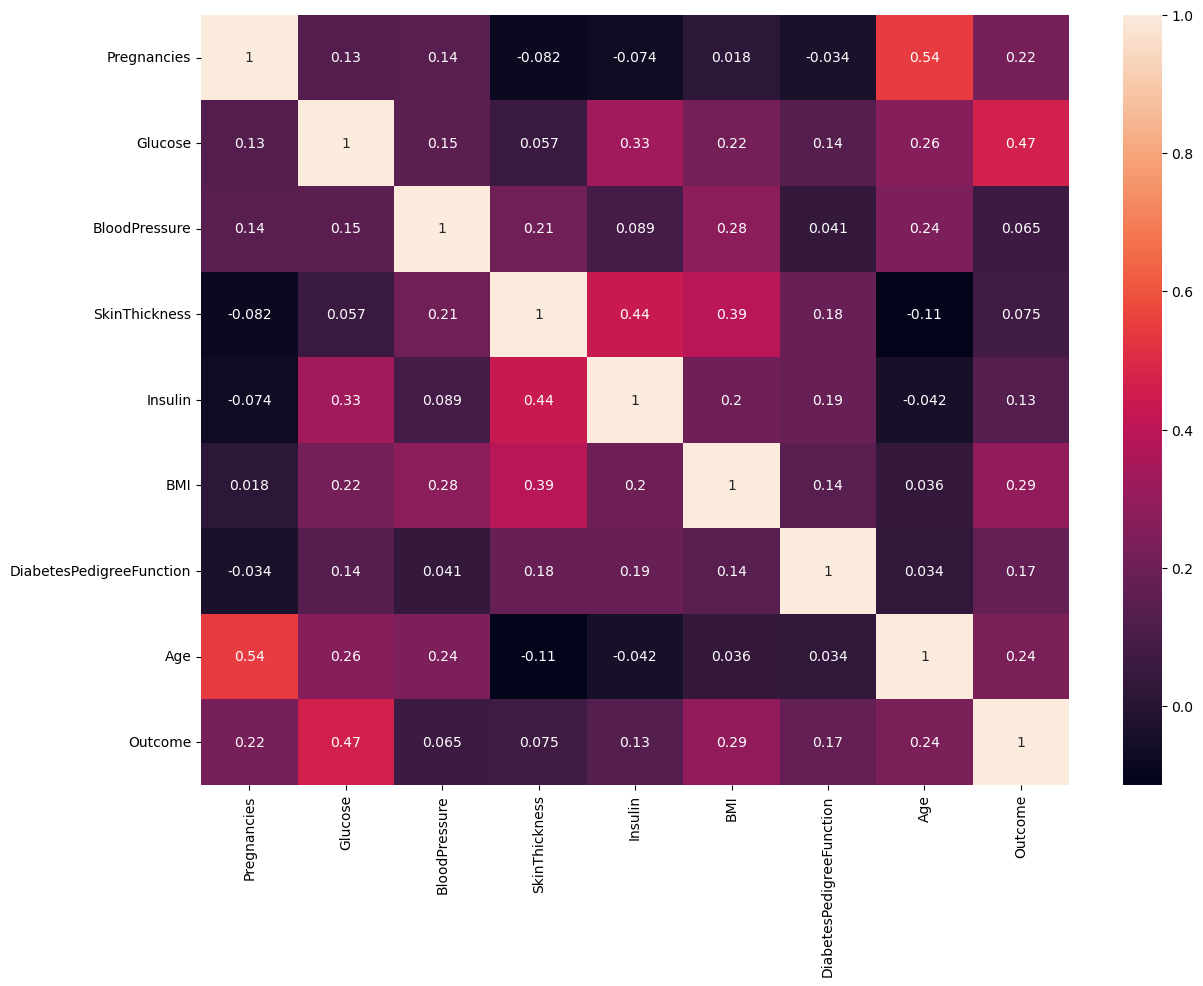

In [10]:
plt.figure(figsize= (14,10))
sns.heatmap(data.corr(),annot = True , cmap = "rocket")

# Features Separating 

In [11]:
x = data.drop(['Outcome'], axis=1)
y = data['Outcome']

#### X contains the expected target values we need to predict later

#### Y contains the target values

# Splitting the Dataset 

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

### split the data: 75% to train on and 25% to test on

# Modeling with Decision tree

### Start fitting the training and testing data to the model 

### Then save the model predictions to a variable to compare later

In [13]:
DT = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DT.fit(x_train, y_train)
y_pred_DT = DT.predict(x_test)

###  Printing visualization

In [14]:
from sklearn import tree
text_representation = tree.export_text(DT)
print(text_representation)

|--- feature_0 <= 6.69
|   |--- feature_1 <= 119.53
|   |   |--- feature_3 <= 34.62
|   |   |   |--- feature_1 <= 94.04
|   |   |   |   |--- feature_3 <= 28.92
|   |   |   |   |   |--- feature_0 <= 3.15
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  3.15
|   |   |   |   |   |   |--- feature_3 <= 9.97
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  9.97
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  28.92
|   |   |   |   |   |--- feature_5 <= 36.19
|   |   |   |   |   |   |--- feature_7 <= 25.58
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  25.58
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  36.19
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  94.04
|   |   |   |   |--- feature_7 <= 37.88
|   |   |   |   |   |--- feature_1 <= 114.54
|   |   |   |   |   |   |--- feature_1 <= 110.44
|   |   |   |   |   | 

### Applying Plot_tree

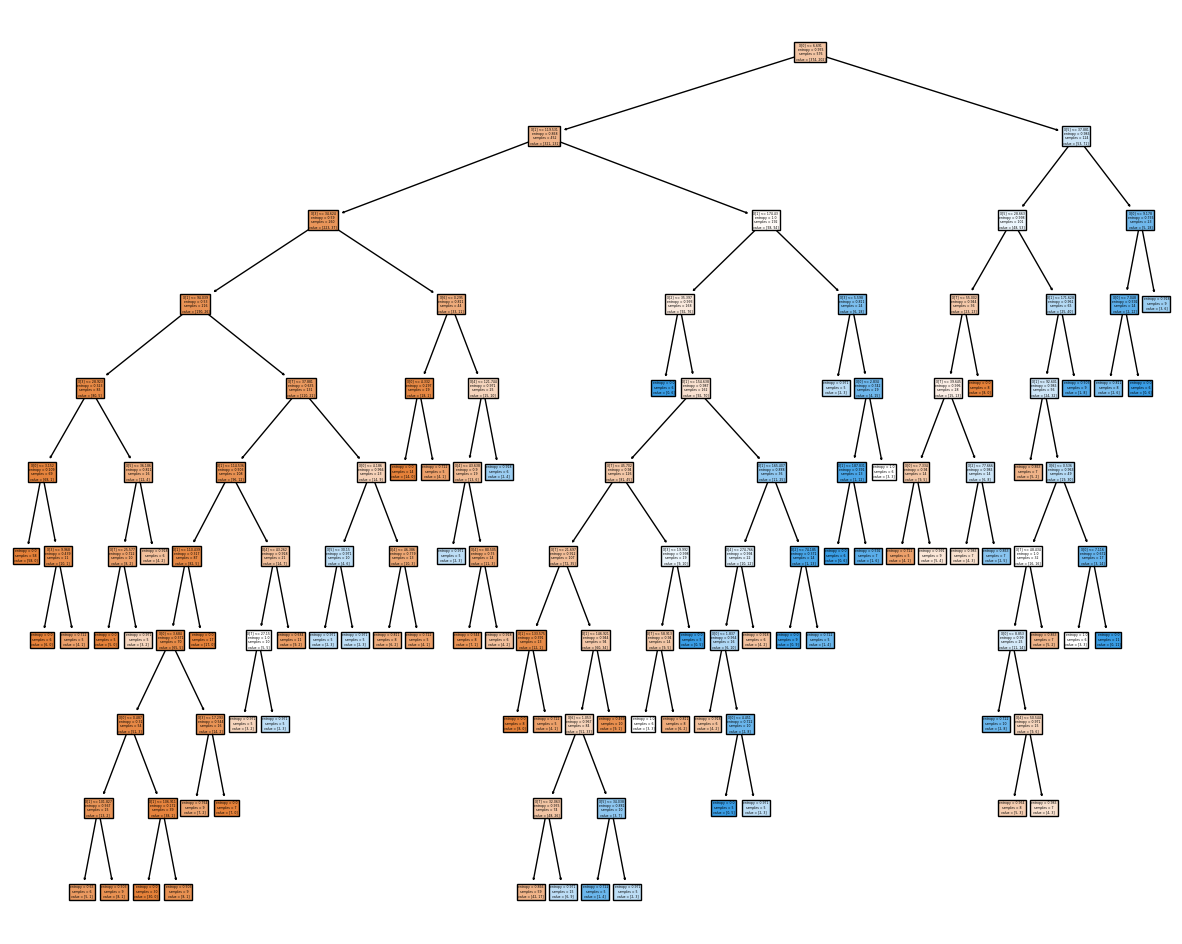

In [15]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT , filled=True);

### Comparing the actual data with the prediction

In [16]:
d = pd.DataFrame({"Y_TEST":y_test,"Y_Pred": y_pred_DT})
d

,Y_TEST,Y_Pred
390,0,1
146,0,0
136,0,0
420,0,1
328,1,0
...,...,...
18,0,0
633,0,0
214,1,0
203,0,0


In [17]:
DTAcc = DT.score(x_train,y_train)

# logistical regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()

In [20]:
lr.fit(x_train , y_train)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
LRAcc= lr.score(x_train , y_train)

### Create Accuracy Comparison Table

In [22]:
compare = pd.DataFrame({'Model': ['Decision Tree','LogisticRegression'],  
                        'Accuracy': [ DTAcc*100, LRAcc*100]})

compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

C:\Users\zee52\AppData\Local\Temp\ipykernel_19380\191893920.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})


Model,Accuracy
Decision Tree,81.250000
LogisticRegression,76.215278
